In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load the data and take a peek
df = pd.read_csv("stroke_data.csv")
df.head()

,Stroke,NASCET,CALCVol,CALCVolProp,MATXVol,MATXVolProp,LRNCVol,LRNCVolProp,MaxCALCArea,MaxCALCAreaProp,...,WallVol,MaxStenosisByDiameter,age,sex,SmokingHistory,AtrialFibrillation,CoronaryArteryDisease,DiabetesHistory,HypercholesterolemiaHistory,HypertensionHistory
0,N,0,235.252599,0.070443,3156.834690,0.759958,224.871710,0.091085,12.350494,0.365768,...,4192.170353,10.544113,72,1,1,0,0,0,0,1
1,N,0,31.433595,0.016165,3032.860796,0.813306,368.560663,0.133989,7.130660,0.211247,...,3917.039836,18.646197,76,1,1,0,0,1,1,1
2,N,0,113.404823,0.038081,3835.220140,0.782526,321.158928,0.083037,16.286916,0.408811,...,4935.327463,19.735114,72,0,0,0,0,0,0,0
3,Y,0,780.823789,0.213432,3518.876937,0.761089,140.517346,0.032065,63.350869,0.576206,...,4909.503817,20.288317,61,1,1,0,0,1,1,1
4,N,0,84.055774,0.041384,2990.273268,0.749869,293.269922,0.075398,17.583561,0.321507,...,4045.053268,49.297050,65,1,0,0,0,0,0,1


In [104]:
# select 30% to set aside, stratified by stroke
p = 0.3
rng = np.random.default_rng(42) # yes, this is an over-used random number seed
n_test = int(p * len(df))
is_stroke = df["Stroke"] == "Y"
not_stroke = df["Stroke"] == "N"
n_stroke = int(p * is_stroke.sum())
test_ids = np.hstack([rng.choice(np.where(is_stroke)[0], n_stroke),
                     rng.choice(np.where(~is_stroke)[0], n_test - n_stroke)])
train_ids = np.setdiff1d(np.arange(len(df)), test_ids)
test = df.iloc[test_ids]
train = df.iloc[train_ids]

# re-define the is_stroke and not_stroke to relate to the training set
is_stroke = train["Stroke"] == "Y"
not_stroke = train["Stroke"] == "N"

In [66]:
# Verify the splits
print(pd.DataFrame([train.value_counts("Stroke"), test.value_counts("Stroke")], ["Train", "Test"]))

Stroke   N   Y
Train   46  46
Test    18  19


In [71]:
# explore the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 125
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Stroke                       92 non-null     object 
 1   NASCET                       92 non-null     int64  
 2   CALCVol                      92 non-null     float64
 3   CALCVolProp                  92 non-null     float64
 4   MATXVol                      92 non-null     float64
 5   MATXVolProp                  92 non-null     float64
 6   LRNCVol                      92 non-null     float64
 7   LRNCVolProp                  92 non-null     float64
 8   MaxCALCArea                  92 non-null     float64
 9   MaxCALCAreaProp              92 non-null     float64
 10  MaxDilationByArea            92 non-null     float64
 11  MaxMATXArea                  92 non-null     float64
 12  MaxMATXAreaProp              92 non-null     float64
 13  MaxLRNCArea               

Text(0.5, 1.0, 'Maximum cross-sectional area of lipid-rich necrotic core')

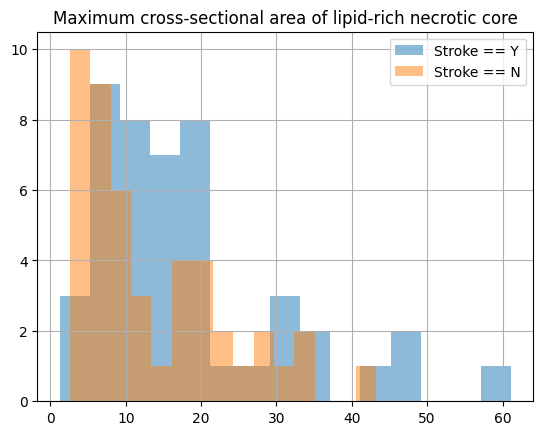

In [105]:
# look at the MaxLRNCArea
train[is_stroke]["MaxLRNCArea"].hist(bins=15, alpha=0.5)
train[not_stroke]["MaxLRNCArea"].hist(bins=15, alpha=0.5)
plt.legend(["Stroke == Y", "Stroke == N"])
plt.title("Maximum cross-sectional area of lipid-rich necrotic core")

Text(0.5, 1.0, 'Log of maximum cross-sectional area of lipid-rich necrotic core')

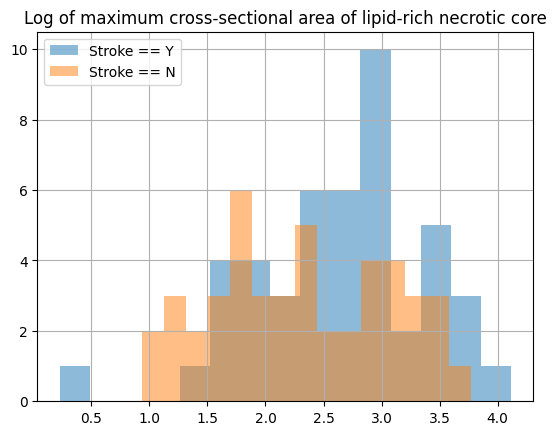

In [115]:
# transfrom MaxLRNCArea and re-do the histogram
t = train["MaxLRNCArea"].apply(lambda x: np.log(x))
t[is_stroke].hist(bins=15, alpha=0.5)
t[not_stroke].hist(bins=15, alpha=0.5)
plt.legend(["Stroke == Y", "Stroke == N"])
plt.title("Log of maximum cross-sectional area of lipid-rich necrotic core")

In [118]:
# Group the imaging predictors and risk factors
VC_preds = ["CALCVol", "CALCVolProp", "MATXVol", "MATXVolProp", "LRNCVol", 
    "LRNCVolProp", "MaxCALCArea", "MaxCALCAreaProp", "MaxDilationByArea", 
    "MaxMATXArea", "MaxMATXAreaProp", "MaxLRNCArea", "MaxLRNCAreaProp", 
    "MaxMaxWallThickness", "MaxRemodelingRatio", "MaxStenosisByArea", 
    "MaxWallArea", "WallVol", "MaxStenosisByDiameter"]
risk_preds = ["age", "sex", "SmokingHistory", "AtrialFibrillation", "CoronaryArteryDisease", 
    "DiabetesHistory", "HypercholesterolemiaHistory", "HypertensionHistory"]

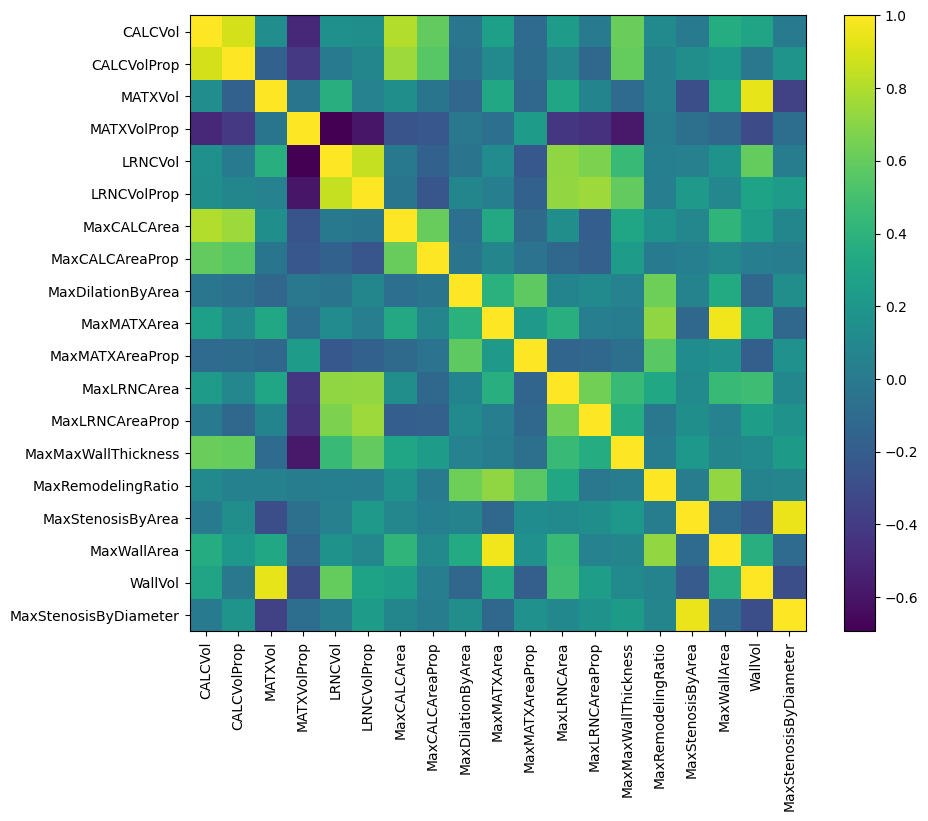

In [ ]:
# Look at the correlation coefficients of the imaging predictors
plt.figure(figsize=(10,8))
plt.imshow(train[VC_preds].corr())
plt.colorbar()
plt.xticks(range(len(VC_preds)), VC_preds, rotation=90)
plt.yticks(range(len(VC_preds)), VC_preds)
plt.show()